In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix,accuracy_score

In [27]:
# Funckja do generowania losowych danych z rozkładu gaussa 2D
def GenData(m,cov,n):
    X_tmp = [0 for x in range(len(n))]
    y_tmp = [0 for x in range(len(n))]

    for i in range(len(n)):
        X_tmp[i] = np.random.multivariate_normal(m[i], cov, n[i])
        y_tmp[i] = np.full(n[i],i+1)

    X = np.concatenate(X_tmp,axis=0)
    y = np.concatenate(y_tmp,axis=0)
    
    return X,y

In [87]:
# Generowanie nieseparowalnych danych pochodzących z rozkładu Gaussa
cov = np.array([[1,0],[0,1]])
n = [30,30,30]
m = [np.array([-1,-1]),np.array([2,4]),np.array([-2,2])]

X,y = GenData(m,cov,n)

In [88]:
# SVM dla różnych C
C = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500]
svm_acc = []

for c in C:
    svm = SVC(C=c,kernel='linear')
    svm.fit(X,y)
    preditions_svm = svm.predict(X)
    svm_acc.append(accuracy_score(y,preditions_svm))

In [89]:
# LDA

lda = LDA()
lda.fit(X,y)
preditions_lda = lda.predict(X)

lda_acc = [accuracy_score(y,preditions_lda) for x in range(len(C))]

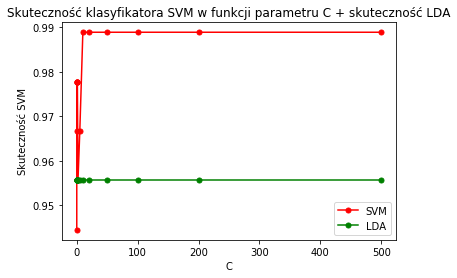

In [90]:
# wykresy

fig, ax = plt.subplots()
ax.plot(C,svm_acc,color='red', linestyle='-', marker='o',markerfacecolor='red', markersize=5, label="SVM")
ax.plot(C,lda_acc,color='green', linestyle='-',marker='o',markerfacecolor='green', markersize=5, label="LDA")
ax.set_title('Skuteczność klasyfikatora SVM w funkcji parametru C + skuteczność LDA')
ax.set_xlabel('C')
ax.set_ylabel('Skuteczność SVM')
ax.legend()

plt.show()

#### Na powyższym wykresie widać, że skuteczność klasyfikatora SVM liniowego jest tym większa im większa jest wartość parametru C aż do wartośći 10. Dalsze zwiększanie parametru C nie podnosi już dalej skutecznośći klasyfikatora. W porównaniu do klasyfikatora LDA, SVM osiąga lepszą skuteczność dla C>10.

In [96]:
# SVM z C=10

svm = SVC(C=10,kernel='linear')
svm.fit(X,y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

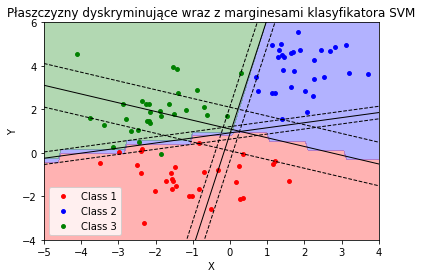

In [97]:
# Marginesy dla każdej z klas
for i in range(len(n)):
    w = svm.coef_[i]
    b = -w[0] / w[1]
    xx = np.linspace(-5,5)
    yy = b * xx - (svm.intercept_[i]) / w[1]
    marg = 1 / np.sqrt(np.sum(svm.coef_[i] ** 2))
    marg_down = yy - np.sqrt(1 + b ** 2) * marg
    marg_up = yy + np.sqrt(1 + b ** 2) * marg
    
    plt.plot(xx, yy, color="black", linestyle='-', linewidth=1)
    plt.plot(xx, marg_down, color="black", linestyle='--', linewidth=1)
    plt.plot(xx, marg_up, color="black", linestyle='--', linewidth=1)

# Płaszczyzny rozdzielające klasy
lim = plt.axis()
xx, yy = np.meshgrid(np.linspace(lim[0], lim[1], 150), np.linspace(lim[2], lim[3], 150))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, 2, alpha=0.3, colors=("red","blue","green"))

# Rysowanie wygenerowanych danych
plt.scatter(X[:30,0], X[:30,1], color = "red",s=15, label="Class 1")
plt.scatter(X[30:60,0], X[30:60,1], color = "blue",s=15, label="Class 2")
plt.scatter(X[60:90,0], X[60:90,1], color = "green",s=15, label="Class 3")

plt.title("Płaszczyzny dyskryminujące wraz z marginesami klasyfikatora SVM")
plt.xlim(-5,4)
plt.ylim(-4,6)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

#### Powyższy wykres prezentuje jak układają się płaszczyzny dyskryminujące 3 klasy wraz z narysowanymi marginesami maszyn wektorów podpierających oraz punktami z odpowiednich klas. Pomimo tego, że są dane pochodzą z rozkładu gaussa dwuwymiarowego o różnych średnich to udało się uzyskać liniową separowalność.